<a href="https://colab.research.google.com/github/rpizarrog/machine_learning_r_python_casos_de_estudio/blob/main/notebook_Python/UMAP_datos_de_pol%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso UMAP votantes partidos políticos


# Objetivo

Implementar e interprtar el modelo de reducción de dimensionalidad UMAP con datos de votantes y sipatizantes de partidos políticos.

# Los datos

El contexto de los datos es una simulación de simpatizantes que tienen características de tener copnviocciones sobre algún partido pólítuco. Los nombres de los partidos son puramente imaginarios pero que bien podrían asociarse a algún partido polítiuco real de cualquie región del mundo.






# Desarrollo

## Cargar librerías




In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import time # Para medir tiempos de ejecución
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar funciones

In [ ]:
# Función que visualzia la dispersión de datos de un modelo UMAP,
# recibe los datos de dos dimensiones y los datos originales las columnas categóricas
# recibe también las variables que son caterósticas y los títulos para personalziar visualización
# Despliega 4 dispersiones de acuerdo a variables categóricas recibidas


# Función que visualiza la dispersión de datos de un modelo UMAP
def f_visualizar_dispersion_UMAP(datos_umap, variables_categoricas, titulos):
    if len(variables_categoricas) != len(titulos):
        raise ValueError("El número de variables categóricas debe coincidir con el número de títulos.")

    n_plots = len(variables_categoricas)
    if n_plots > 4:
        print("Advertencia: Se mostrarán solo los primeros 4 gráficos.")
        n_plots = 4

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
    plt.style.use('seaborn-v0_8-whitegrid')

    for i, ax in enumerate(axes.flat):
        if i < n_plots:
            sns.scatterplot(
                x="UMAP1", y="UMAP2",
                hue=variables_categoricas[i],
                palette="Set1",
                data=datos_umap,
                legend="full",
                alpha=0.7,
                ax=ax
            )
            ax.set_title(titulos[i], fontsize=16)
            ax.set_xlabel('Componente UMAP 1')
            ax.set_ylabel('Componente UMAP 2')
        else:
            ax.axis('off')

    plt.suptitle('Análisis UMAP de Perfiles de Encuestados', fontsize=24, y=1.02)
    plt.tight_layout()
    plt.show()

## Construir datos

In [ ]:
np.random.seed(2025)

# Definir las características del dataset
num_registros = 7000
num_vars_numericas = 15

# Listas para las variables categóricas
partidos = ['Partido Progresista', 'Partido Moderado', 'Partido Conservador']
regiones = ['Norte', 'Sur', 'Este', 'Oeste']
generos = ['Hombre', 'Mujer']
cargos = ['Senador', 'Representante']

# Nombres de las leyes propuestos
nombres_leyes = [
    'Ley de Servicios de Salud Universales',
    'Ley para la Educación Pública Gratuita',
    'Ley de Protección de la Inmigración',
    'Ley de Apoyo a la Tecnología Sostenible',
    'Ley de Acceso al Empleo Digno',
    'Ley de Fomento a la Pequeña Ganadería',
    'Ley de Incentivos al Turismo Comunitario',
    'Ley de Modernización de la Industria',
    'Ley para el Comercio Justo',
    'Ley de Infraestructura Ciudadana',
    'Ley de Protección Forestal Privada',
    'Ley para la Seguridad Fronteriza',
    'Ley de Pensiones Privadas',
    'Ley de Reducción de Impuestos a la Industria',
    'Ley de Libre Mercado y Comercio Internacional'
]

# Simular los datos numéricos basados en los partidos para crear clusters
patrones_voto = {
    'Partido Progresista': np.linspace(90, 10, num_vars_numericas),
    'Partido Moderado': np.linspace(50, 50, num_vars_numericas),
    'Partido Conservador': np.linspace(10, 90, num_vars_numericas)
}

# Generar los datos
datos_generados = {
    'Partido': [],
    'Region': [],
    'Genero': [],
    'Cargo': []
}

for ley in nombres_leyes:
    datos_generados[ley] = []

for _ in range(num_registros):
    partido_elegido = np.random.choice(partidos)
    datos_generados['Partido'].append(partido_elegido)
    datos_generados['Region'].append(np.random.choice(regiones))
    datos_generados['Genero'].append(np.random.choice(generos))
    datos_generados['Cargo'].append(np.random.choice(cargos))

    for i, ley in enumerate(nombres_leyes):
        promedio_voto = patrones_voto[partido_elegido][i]
        # Generamos un valor numérico continuo con una distribución normal
        voto = np.random.normal(loc=promedio_voto, scale=5)
        # Aseguramos que el voto esté en el rango de 0 a 100
        voto = np.clip(voto, 0, 100)
        voto = round(voto, 2)
        datos_generados[ley].append(voto)

# Crear el DataFrame de pandas
df_politica = pd.DataFrame(datos_generados)

# Mostrar la forma y las primeras filas del DataFrame para verificar
print(f"Número de registros: {df_politica.shape[0]}")
print(f"Número de variables: {df_politica.shape[1]}")
print("\nPrimeros 5 registros del dataset:")


df_politica.to_csv('datos_politica_UMAP.csv', index=False)

df_politica

In [ ]:
# Definir la semilla para reproducibilidad
np.random.seed(2025)

# --- 1. Definir las características del conjunto de datos ---

num_registros = 70000
num_vars_numericas = 15

# Variables categóricas con sus respectivas categorías
partidos = ['Partido Progresista', 'Partido Moderado', 'Partido Conservador']
regiones = ['Norte', 'Sur', 'Este', 'Oeste', 'Centro']
generos = ['Hombre', 'Mujer']
ocupaciones = ['Empleado de gobierno', 'Comerciante', 'Obrero', 'No trabaja', 'Empresario', 'Político', 'Estudiante']

# Definir las probabilidades de las variables demográficas por partido
# Las probabilidades deben sumar 1
prob_region_por_partido = {
    'Partido Progresista': [0.51, 0.03, 0.03, 0.03, 0.40], # Norte y Centro son más progresistas
    'Partido Moderado':    [0.20, 0.20, 0.20, 0.20, 0.20], # Distribuido de forma uniforme
    'Partido Conservador': [0.05, 0.40, 0.25, 0.25, 0.05] # Este y Oeste son más conservadores
}
prob_genero_por_partido = {
    'Partido Progresista': [0.7, 0.3], # Igual probabilidad de Hombre y Mujer
    'Partido Moderado':    [0.5, 0.5],
    'Partido Conservador': [0.1, 0.9]  # Más probabilidad de ser Mujer
}
prob_ocupacion_por_partido = {
    'Partido Progresista': [0.01, 0.45, 0.01, 0.01, 0.45, 0.01, 0.06], # Empresario más probable
    'Partido Moderado':    [0.25, 0.10, 0.15, 0.05, 0.10, 0.15, 0.20], # Empleado y Estudiante más probables
    'Partido Conservador': [0.20, 0.25, 0.25, 0.15, 0.05, 0.05, 0.05]  # Comerciante más probable
}

# Nombres de las 15 leyes (sin cambios)
nombres_leyes = [
    'Ley de Servicios de Salud Universales', 'Ley para la Educación Pública Gratuita', 'Ley de Protección de la Inmigración',
    'Ley de Apoyo a la Tecnología Sostenible', 'Ley de Acceso al Empleo Digno', 'Ley de Fomento a la Pequeña Ganadería',
    'Ley de Incentivos al Turismo Comunitario', 'Ley de Modernización de la Industria', 'Ley para el Comercio Justo',
    'Ley de Infraestructura Ciudadana', 'Ley de Protección Forestal Privada', 'Ley para la Seguridad Fronteriza',
    'Ley de Pensiones Privadas', 'Ley de Reducción de Impuestos a la Industria', 'Ley de Libre Mercado y Comercio Internacional'
]

# Patrones de voto (sin cambios)
patrones_voto = {
    'Partido Progresista': np.linspace(90, 10, num_vars_numericas),
    'Partido Moderado': np.linspace(50, 50, num_vars_numericas),
    'Partido Conservador': np.linspace(10, 90, num_vars_numericas)
}

# --- 2. Generar el conjunto de datos ---

datos_generados = {
    'Partido': [], 'Region': [], 'Genero': [], 'Ocupacion': []
}
for ley in nombres_leyes: datos_generados[ley] = []

for _ in range(num_registros):
    partido_elegido = np.random.choice(partidos)
    datos_generados['Partido'].append(partido_elegido)

    # Asignar las variables demográficas según las probabilidades del partido
    datos_generados['Region'].append(np.random.choice(regiones, p=prob_region_por_partido[partido_elegido]))
    datos_generados['Genero'].append(np.random.choice(generos, p=prob_genero_por_partido[partido_elegido]))
    datos_generados['Ocupacion'].append(np.random.choice(ocupaciones, p=prob_ocupacion_por_partido[partido_elegido]))

    for i, ley in enumerate(nombres_leyes):
        promedio_voto = patrones_voto[partido_elegido][i]
        voto = np.random.normal(loc=promedio_voto, scale=5)
        voto = np.clip(voto, 0, 100)
        voto = round(voto, 2)
        datos_generados[ley].append(voto)

# Crear y guardar el DataFrame
df_politica = pd.DataFrame(datos_generados)
df_politica.to_csv('datos_politica_ciudadanos_UMAP.csv', index=False)

# Mostrar un resumen del conjunto de datos generado
print(f"Número de registros: {df_politica.shape[0]}")
print(f"Número de variables: {df_politica.shape[1]}")
print("\nPrimeros 5 registros del conjunto de datos:")
print(df_politica.head())

Número de registros: 70000
Número de variables: 19

Primeros 5 registros del conjunto de datos:
               Partido  Region Genero             Ocupacion  \
0  Partido Conservador    Este  Mujer  Empleado de gobierno   
1  Partido Conservador     Sur  Mujer  Empleado de gobierno   
2  Partido Conservador   Norte  Mujer           Comerciante   
3  Partido Conservador     Sur  Mujer            No trabaja   
4  Partido Progresista  Centro  Mujer            Empresario   

   Ley de Servicios de Salud Universales  \
0                                  12.97   
1                                  12.44   
2                                  12.65   
3                                  16.49   
4                                  92.32   

   Ley para la Educación Pública Gratuita  \
0                                   16.74   
1                                   15.75   
2                                   13.51   
3                                   12.34   
4                                  

## Cargar datos



In [ ]:
# datos_originales = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/machine_learning_r_python_casos_de_estudio/refs/heads/main/datos/datos_politica_UMAP.csv')
datos_originales = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/machine_learning_r_python_casos_de_estudio/refs/heads/main/datos/datos_politica_ciudadanos_UMAP.csv')
datos_originales

# /content/datos_politica_ciudadanos_UMAP.csv


,Partido,Region,Genero,Ocupacion,Ley de Servicios de Salud Universales,Ley para la Educación Pública Gratuita,Ley de Protección de la Inmigración,Ley de Apoyo a la Tecnología Sostenible,Ley de Acceso al Empleo Digno,Ley de Fomento a la Pequeña Ganadería,Ley de Incentivos al Turismo Comunitario,Ley de Modernización de la Industria,Ley para el Comercio Justo,Ley de Infraestructura Ciudadana,Ley de Protección Forestal Privada,Ley para la Seguridad Fronteriza,Ley de Pensiones Privadas,Ley de Reducción de Impuestos a la Industria,Ley de Libre Mercado y Comercio Internacional
0,Partido Conservador,Este,Mujer,Empleado de gobierno,12.97,16.74,26.12,23.61,27.57,36.74,46.97,38.53,52.20,60.27,73.32,68.56,75.39,79.98,90.02
1,Partido Conservador,Sur,Mujer,Empleado de gobierno,12.44,15.75,22.77,25.84,23.84,39.22,44.69,53.40,54.87,68.53,67.13,72.64,83.37,81.93,93.67
2,Partido Conservador,Norte,Mujer,Comerciante,12.65,13.51,18.86,28.93,40.82,27.92,32.03,41.45,53.10,55.86,68.22,72.51,80.69,91.87,84.92
3,Partido Conservador,Sur,Mujer,No trabaja,16.49,12.34,26.78,26.59,25.89,35.21,37.98,54.51,61.58,56.23,66.36,74.83,72.74,88.97,84.98
4,Partido Progresista,Centro,Mujer,Empresario,92.32,86.13,73.73,71.06,70.82,62.10,50.62,53.75,43.80,31.68,35.74,20.88,15.01,16.11,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,Partido Conservador,Sur,Mujer,Estudiante,11.93,12.35,19.05,29.23,33.67,34.67,37.22,47.25,45.74,60.02,63.64,70.83,79.86,86.21,92.61
69996,Partido Progresista,Centro,Mujer,Empresario,99.75,83.42,79.54,74.56,68.34,62.73,53.13,41.52,50.06,35.06,32.29,27.27,12.10,7.06,9.09
69997,Partido Progresista,Centro,Mujer,Comerciante,82.45,79.12,73.36,71.77,61.30,52.23,52.42,53.81,37.48,40.86,40.78,28.55,24.67,17.32,16.33
69998,Partido Progresista,Centro,Hombre,Comerciante,88.28,76.46,71.68,62.83,64.00,60.99,53.98,46.26,44.58,42.36,26.59,26.96,17.37,18.83,3.57


##  Exploración de los datos


Descripción de los datos numéricos

In [ ]:
datos_originales.describe()

,Ley de Servicios de Salud Universales,Ley para la Educación Pública Gratuita,Ley de Protección de la Inmigración,Ley de Apoyo a la Tecnología Sostenible,Ley de Acceso al Empleo Digno,Ley de Fomento a la Pequeña Ganadería,Ley de Incentivos al Turismo Comunitario,Ley de Modernización de la Industria,Ley para el Comercio Justo,Ley de Infraestructura Ciudadana,Ley de Protección Forestal Privada,Ley para la Seguridad Fronteriza,Ley de Pensiones Privadas,Ley de Reducción de Impuestos a la Industria,Ley de Libre Mercado y Comercio Internacional
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49.989678,49.984782,49.990299,49.968481,50.009311,49.981122,50.033055,50.001181,49.982879,49.992622,50.002743,50.004309,50.025529,49.996421,50.021524
std,33.007881,28.461129,23.845063,19.330138,14.880802,10.578152,6.845025,4.962716,6.838362,10.587024,14.879224,19.356767,23.880955,28.434578,33.011136
min,0.000000,0.000000,3.600000,8.790000,12.350000,20.510000,25.670000,29.270000,21.990000,18.750000,12.160000,8.050000,1.260000,0.000000,0.000000
25%,13.340000,19.070000,24.840000,30.500000,36.150000,41.330000,45.160000,46.610000,45.080000,41.310000,36.200000,30.480000,24.800000,19.100000,13.380000
50%,49.990000,50.010000,50.010000,49.980000,50.000000,49.980000,50.000000,50.000000,49.980000,49.960000,49.970000,49.960000,50.000000,50.050000,49.925000
75%,86.590000,80.930000,75.210000,69.412500,63.840000,58.642500,54.910000,53.330000,54.860000,58.670000,63.840000,69.550000,75.230000,80.870000,86.690000
max,100.000000,100.000000,100.000000,96.970000,86.230000,82.330000,77.210000,75.270000,76.530000,80.160000,87.400000,95.900000,98.070000,100.000000,100.000000


Descripción de los datos categóricos

In [ ]:
datos_originales.describe(include='object')

,Partido,Region,Genero,Ocupacion
count,70000,70000,70000,70000
unique,3,5,2,7
top,Partido Conservador,Norte,Mujer,Comerciante
freq,23358,17789,39808,18653


Estructura de los datos

In [ ]:
datos_originales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Partido                                        70000 non-null  object 
 1   Region                                         70000 non-null  object 
 2   Genero                                         70000 non-null  object 
 3   Ocupacion                                      70000 non-null  object 
 4   Ley de Servicios de Salud Universales          70000 non-null  float64
 5   Ley para la Educación Pública Gratuita         70000 non-null  float64
 6   Ley de Protección de la Inmigración            70000 non-null  float64
 7   Ley de Apoyo a la Tecnología Sostenible        70000 non-null  float64
 8   Ley de Acceso al Empleo Digno                  70000 non-null  float64
 9   Ley de Fomento a la Pequeña Ganadería          700

## Preparar datos


In [ ]:
# --- 2. Preparación de los Datos para UMAP ---

# UMAP solo usa datos numéricos, así que eliminamos las columnas categóricas.
datos_numericos = datos_originales.drop(['Partido', 'Region', 'Genero', 'Ocupacion'], axis=1)



## Construir modelo UMAP

Se construye el modelo *UMAP* solo con los datos numéricos. Se toma el tiempo de construción del modelo con las funciones de librería *time*. El tiempo estimado es de aproximadamente *90* segundos para construir el modelo con *70000* registros y *15* variables numéricas, esta ejecución en* google collab * en equipo laptop con las características citadas con anterioridad.

El argumento de *min_dist=0.5* tiene que ver con que tan junto estan los datos en cada grupo si es bajo están muy juntos *0.1* si es alto como *0.8* esán mas alejados; es decir locales o globales.




In [ ]:
# Aplicación de UMAP y Visualización ---

# Iniciar el temporizador
start_time = time.time()

# Inicializar el modelo UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.95, random_state=2025)

# Proyectar los datos numéricos a 2D
embedding = reducer.fit_transform(datos_numericos)

# Detener el temporizador y calcular el tiempo transcurrido
end_time = time.time()
tiempo_total = end_time - start_time
print(f"Tiempo total de ejecución: {tiempo_total} segundos")


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tiempo total de ejecución: 89.9497857093811 segundos


## Crear conjunto de datos 2D


In [ ]:
# Crear un DataFrame para la visualización con las coordenadas UMAP
df_UMAP2D = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
# df_UMAP2D['Partido'] = datos_originales['Partido']
df_UMAP2D



,UMAP1,UMAP2
0,11.292443,1.808582
1,10.046421,3.834199
2,9.107242,-0.722801
3,11.040719,0.522728
4,6.474251,11.695075
...,...,...
69995,10.491832,1.763082
69996,6.003643,9.517769
69997,4.730477,11.224364
69998,3.582828,11.957793


## Diagrama de dispersión de datos 2D

KeyError: 'Partido'

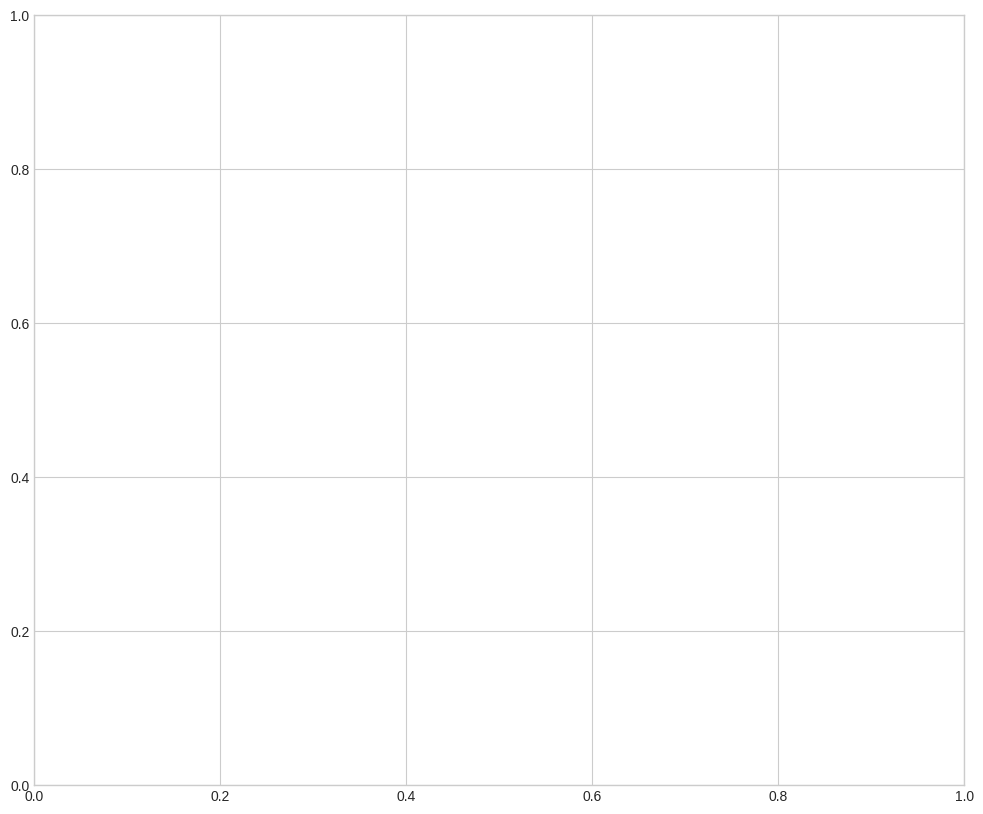

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Crear un mapa de colores para los partidos
colores = {'Partido Progresista': 'blue', 'Partido Moderado': 'green', 'Partido Conservador': 'red'}
plt.scatter(df_UMAP2D['UMAP1'], df_UMAP2D['UMAP2'], s=5, c=df_UMAP2D['Partido'].map(colores), alpha=0.8)

# Añadir leyenda y títulos
plt.title('Proyección UMAP de Votantes Políticos', fontsize=18)
plt.xlabel('Componente UMAP 1', fontsize=12)
plt.ylabel('Componente UMAP 2', fontsize=12)

# Crear una leyenda manual para los colores
for partido, color in colores.items():
    plt.scatter([], [], c=color, label=partido)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Partido')
plt.grid(True)
plt.show()


## Visualziar 2D de UMAP

Utilziar la función


In [ ]:
datos_UMAP_df = df_UMAP2D
datos_UMAP_df['Partido'] = datos_originales['Partido'].values
datos_UMAP_df['Region'] = datos_originales['Region'].values
datos_UMAP_df['Genero'] = datos_originales['Genero'].values
datos_UMAP_df['Ocupacion'] = datos_originales['Ocupacion'].values
datos_UMAP_df

,UMAP1,UMAP2,Partido,Region,Genero,Ocupacion
0,11.292443,1.808582,Partido Conservador,Este,Mujer,Empleado de gobierno
1,10.046421,3.834199,Partido Conservador,Sur,Mujer,Empleado de gobierno
2,9.107242,-0.722801,Partido Conservador,Norte,Mujer,Comerciante
3,11.040719,0.522728,Partido Conservador,Sur,Mujer,No trabaja
4,6.474251,11.695075,Partido Progresista,Centro,Mujer,Empresario
...,...,...,...,...,...,...
69995,10.491832,1.763082,Partido Conservador,Sur,Mujer,Estudiante
69996,6.003643,9.517769,Partido Progresista,Centro,Mujer,Empresario
69997,4.730477,11.224364,Partido Progresista,Centro,Mujer,Comerciante
69998,3.582828,11.957793,Partido Progresista,Centro,Hombre,Comerciante


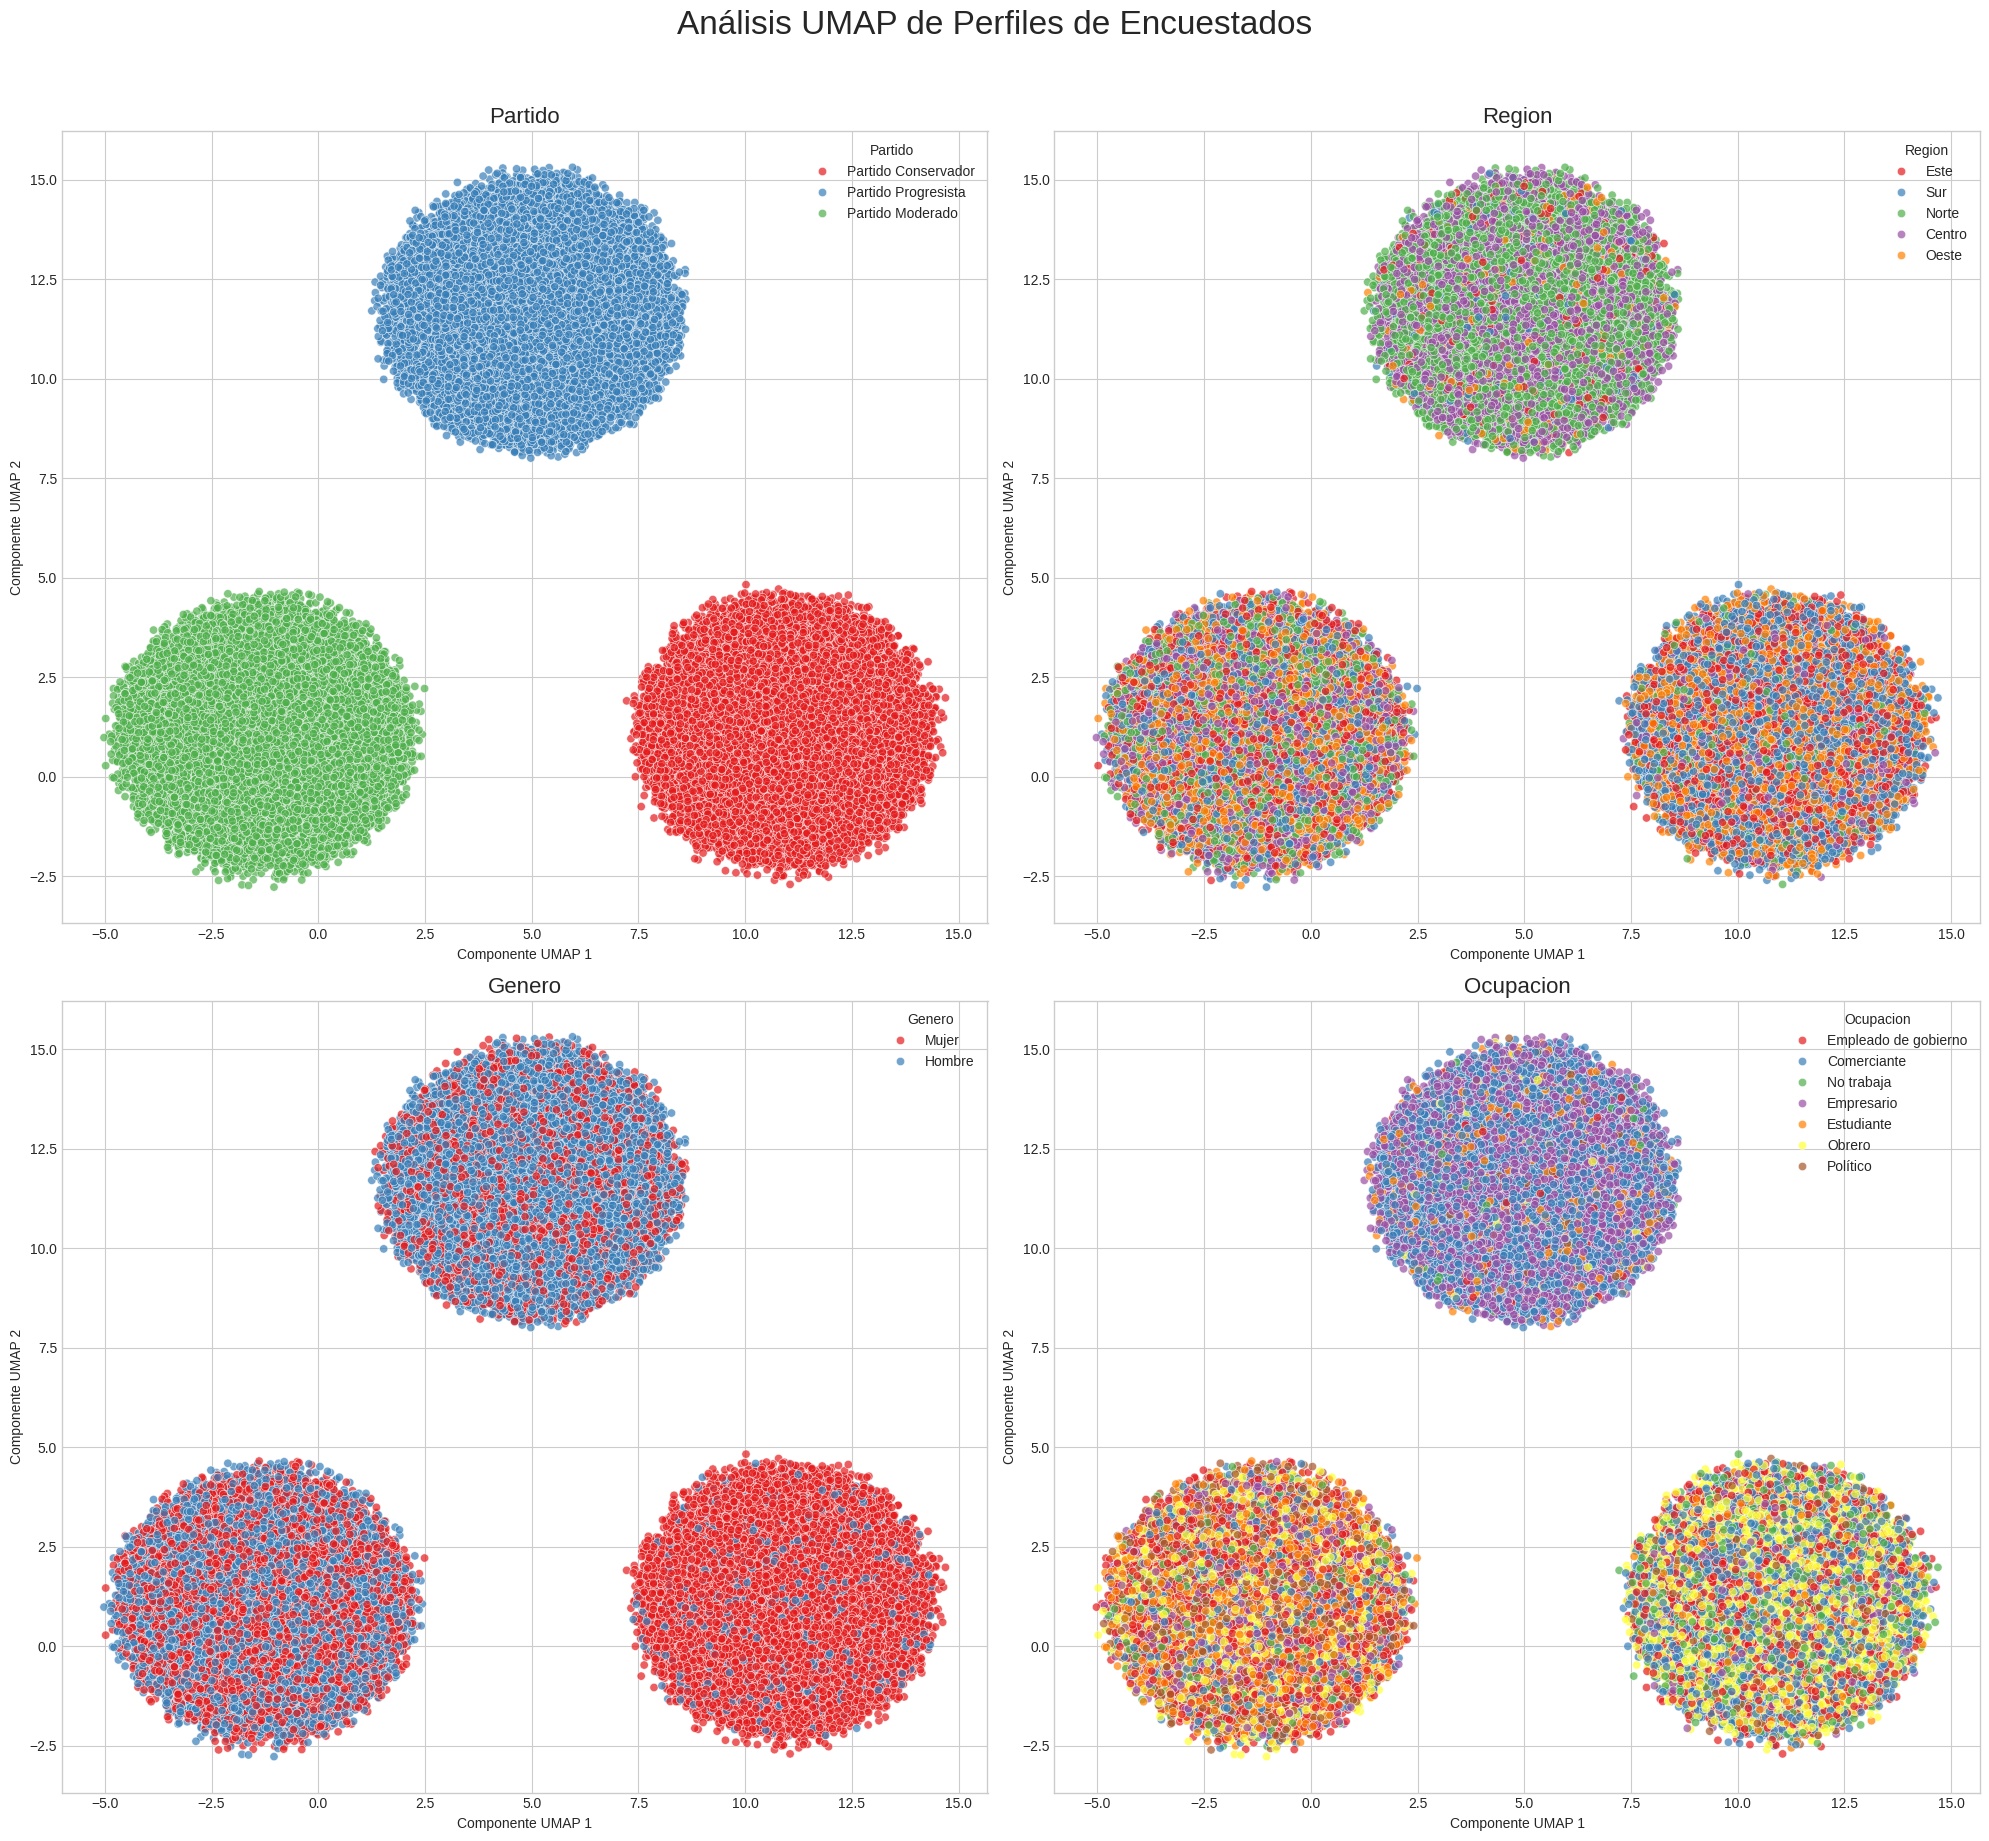

In [ ]:
variables = ['Partido', 'Region', 'Genero', 'Ocupacion']
titulos = ['Partido', 'Region', 'Genero', 'Ocupacion']
# Llamada a la función para generar la matriz de gráficos
f_visualizar_dispersion_UMAP(datos_UMAP_df ,variables, titulos)

# Interpretación

Se cosntruyó un modelo *UMAP* con *70000* registros de percepción del voto de simpatizantes. El modelo se construye únicamente con las variables numéricas.

La proyección del modelo *UMAP*  con los datos de simpatizantes de partidos polítivos es claramente visible con grupos identificados de acuerdo a la matriz *2D*. El modelo ha logrado el objetivo principal: tomar un conjunto de datos complejo con *15* variables de voto y representarlo en solo dos dimensiones, revelando la estructura subyacente de los datos.

Identificación de grupos: La imagen muestra tres grupos de puntos claramente.Esto significa que el modelo destaca tres grupos distintos de votantes en los datos, basándose únicamente en la similitud de sus patrones de voto.

El algoritmo no "sabía" de antemano que había tres partidos, ni que región, ni que ocupación ni que género. El modelo sólo utiliza las percepciones de los ciudadanos a las leyes prpuestas. Los datos categoritos no participan en el modelo, solo sirven para validar resultados del mismo con los datos numéricos.

El gráfico valida perfectamente el resultado del modelo en relación a los partidos a donde pertenecen los ciudadanos. Cuando se le dice a *UMAP* a qué partido pertenece cada punto (información que no usó para generar la proyección), se observanque cada *clúster* corresponde exactamente a un partido político:

En la imagen superior izquieda, el grupo de arriba con color azul representa a los votantes del Partido Progresista; el grupo abajo a la derecha color rojo representa a los votantes del Partido Conservador; el grupo abajo izquierda color verde representa a los votantes del Partido Moderado.

Los grupos reflejan patrones de votación perfectamente diferentes lo que concluye que a partir de encuenstas seguramente el modelo debe identificar a que partido pertenece.

Por otra parte se observa que las regiones Centro y Norte tiene relación con el Partido Progresista.

Con respecto al género hay mas simpatizantess hombres con el Partido Progresista que mujeres, por el comntrario hay mas mujeres simpatizantes con el Partido Consevador.

En relación a la ocupación, los Empresario, Comerciantes y Estudiantes se relacionan con el Partido Progresista.


